# 1. The Plot function

In [1]:
def make_logistic(r, a, b, c):
    def f_logistic(t):
        return a / (b + c * exp(-r * t))
    return f_logistic


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
r = 0.15
a = 20.0
c = 15.0
b1, b2, b3 = 2.0, 3.0, 4.0

logistic1 = make_logistic(r, a, b1, c)
logistic2 = make_logistic(r, a, b2, c)
logistic3 = make_logistic(r, a, b3, c)

### Adding a title, labels, and a legend

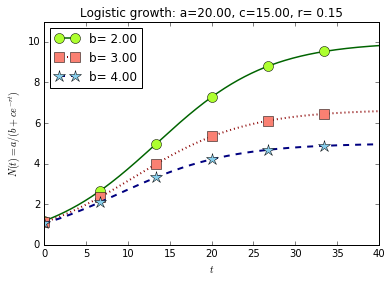

In [19]:
plot(tvalues, logistic1(tvalues), linewidth=1.5, color='DarkGreen', linestyle='-',
marker='o', markevery=50, markerfacecolor='GreenYellow', markersize=10.0)
plot(tvalues, logistic2(tvalues), linewidth=2.0, color='#8B0000', linestyle=':',
marker='s', markevery=50, markerfacecolor='Salmon', markersize=10.0)
plot(tvalues, logistic3(tvalues), linewidth=2.0, color=(0.0, 0.0, 0.5), linestyle='--',
marker = '*', markevery=50, markerfacecolor='SkyBlue', markersize=12.0)
axis([0, tmax, 0, 11.])

title('Logistic growth: a={:5.2f}, c={:5.2f}, r={:5.2f}'.format(a, c, r))
xlabel('$t$')
ylabel('$N(t)=a/(b+ce^{-rt})$')

legend(['b={:5.2f}'.format(b1),
        'b={:5.2f}'.format(b2),
        'b={:5.2f}'.format(b3)], loc='upper left')

None

The plot() function supports plotting several curves in the same function call.

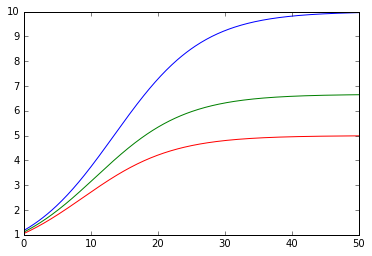

In [7]:
tmax = 50
tvalues = linspace(0, tmax, 300)
plot(tvalues, logistic1(tvalues),
     tvalues, logistic2(tvalues),
     tvalues, logistic3(tvalues))

# 2. Text and annotations

In [20]:
f = lambda x: (x**3 - 6*x**2 + 9*x + 3)/ (1 + 0.25*x**2)
xvalues = linspace(0, 5, 200)

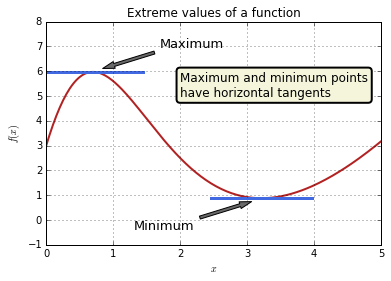

In [29]:
plot(xvalues, f(xvalues), lw=2, color='FireBrick')
axis([0, 5, -1, 8])
grid()
xlabel('$x$')
ylabel('$f(x)$')
title('Extreme values of a function')

arrow_props = dict(facecolor='DimGray', width=3, shrink=0.05, headwidth=7)
delta = array([0.1, 0.1])
offset = array([1.0, .85])

annotate('Maximum', xy=p_max+delta, xytext=p_max+offset,
            arrowprops=arrow_props, verticalalignment='bottom',
            horizontalalignment='left', fontsize=13)
annotate('Minimum', xy=p_min-delta, xytext=p_min-offset,
            arrowprops=arrow_props, verticalalignment='top',
            horizontalalignment='right', fontsize=13)

bbox_props = dict(boxstyle='round', lw=2, fc='Beige')
text(2, 6, 'Maximum and minimum points\nhave horizontal tangents',
    bbox= bbox_props, fontsize=12, verticalalignment='top')

plot([x_min - 0.75, x_min+0.75], [f_min, f_min],
    color='RoyalBlue', lw=3)

plot([x_max - 0.75, x_max+0.75], [f_max, f_max],
    color='RoyalBlue', lw=3)
None

In [27]:
x_min = 3.2123
f_min = f(x_min)
x_max = 0.698
f_max = f(x_max)
p_min = array([x_min, f_min])
p_max = array([x_max, f_max])
print p_min
print p_max

[ 3.2123      0.87850011]
[ 0.698       5.97150867]


# 3. Three-dimensional plots

In [30]:
from mpl_toolkits.mplot3d import axes3d

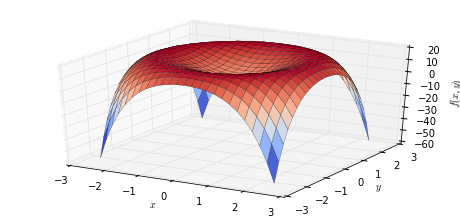

In [31]:
# Let's draw the surface plot
def dist(x, y):
    return sqrt(x**2 + y**2)

def fsurface(x, y):
    d = sqrt(x**2 + y**2)
    c = 5.0
    r = 7.5
    return c - (d **4 - r * d**2)

xybound = 2.5
fig = figure(figsize=(8,8))
ax = subplot(2, 1, 1, projection='3d')
X = linspace(-xybound, xybound, 25)
Y = linspace(-xybound, xybound, 25)
X, Y = meshgrid(X, Y)
Z = fsurface(X, Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap = cm.coolwarm,
               antialiased = True, linewidth=0.2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$f(x,y)$')
None


Add a contour plot to the graph

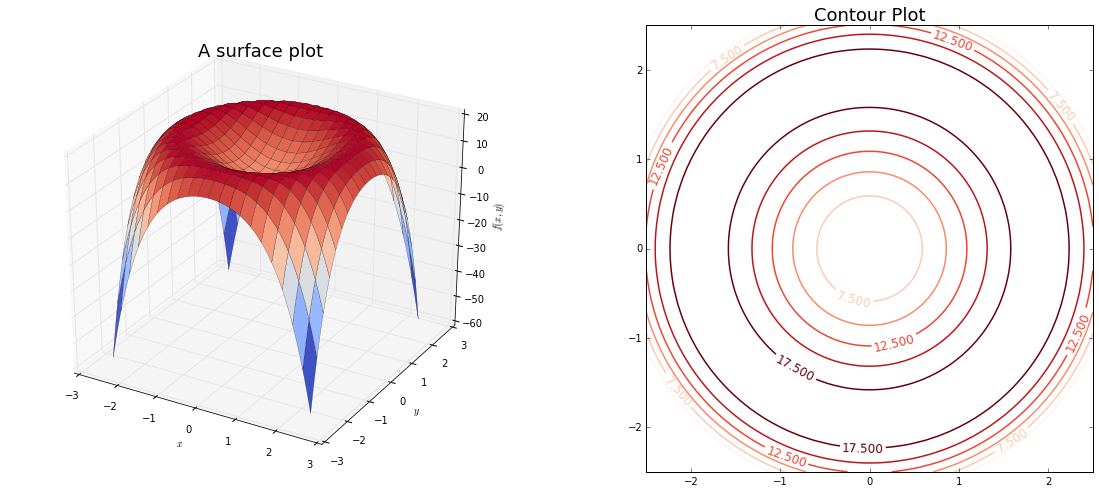

In [40]:
fig = figure(figsize=(20,8))
ax1 = subplot(1, 2, 1, projection='3d')
X = linspace(-xybound, xybound, 100)
Y = linspace(-xybound, xybound, 100)
X, Y = meshgrid(X, Y)
Z = fsurface(X, Y)

ax1.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap = cm.coolwarm,
               antialiased = True, linewidth=0.2)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.set_zlabel(r'$f(x,y)$')
ax1.set_title('A surface plot', fontsize=18)

ax2 = subplot(1, 2, 2)
ax2.set_aspect('equal')
levels = arange(5, 20, 2.5)
cs = ax2.contour(X, Y, Z, levels, cmap=cm.Reds, linewidths=1.5)
cs.clabel(levels[1::2], fontsize=12)
ax2.set_title('Contour Plot', fontsize=18)
None